# Words Analysis

This analysis analyses collected text and meta-data from scientific articles about that mention ERPs.

Available information includes the titles, words, and years of all those papers such that this data can be used for further analysis.

In [1]:
%matplotlib inline

from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

from lisc import Words
from lisc.data import ArticlesAll
from lisc.data.utils import threshold_counter, combine_lists
from lisc.utils import SCDB, load_object
from lisc.utils.io import load_txt_file
from lisc.plts.words import plot_years, plot_wordcloud
from lisc.analysis.words import get_all_counts, get_all_values, get_attribute_counts

In [2]:
import seaborn as sns
sns.set_context('talk')

In [3]:
# Import custom project code
import sys
sys.path.append('../code')
from plts import plot_count_hist, plot_attrs_by_year

## Setup

In [4]:
# Settings
SAVE_FIG = False

In [5]:
# Set the file locations
term_dir = '../terms/'
figs_dir = '../data/figures/words'
db = SCDB('../data/')

In [6]:
# Set the name of the file to load
name = 'erps' # 'erps', 'test'

In [7]:
# Load the words object
words = load_object('words_' + name, directory=db, reload_results=True)

In [8]:
# Load exclusions for analysis
exclusions = load_txt_file('analysis_exclusions.txt', term_dir, split_elements=False)

### Check Database Information

Check the metadata about the data collection, including checking the database data were collected from.

In [9]:
# Check database scrape info
words.meta_data.db_info

{'dbname': 'pubmed',
 'menuname': 'PubMed',
 'description': 'PubMed bibliographic record',
 'dbbuild': 'Build210530-1333.1',
 'count': '32606554',
 'lastupdate': '2021/05/30 18:23'}

In [10]:
# Check requester object info
words.meta_data.requester

{'n_requests': 464,
 'wait_time': 0.1,
 'start_time': '02:22:27 Monday 31 May 2021',
 'end_time': '02:54:32 Monday 31 May 2021',
 'logging': 'file'}

## Data Organization

In [11]:
# Process data to collapse across all articles
words.process_combined_results(exclusions=exclusions)

### Check Number of Articles

In [12]:
# Check the number of ERPs 
print('Number of ERPs: \t {}'.format(words.n_terms))

Number of ERPs: 	 90


In [13]:
# Check the total number of articles in the collected dataset
n_articles = [data.n_articles for data in words]
total_article_count = sum(n_articles)
print('Number of articles: \t', total_article_count)

Number of articles: 	 32101


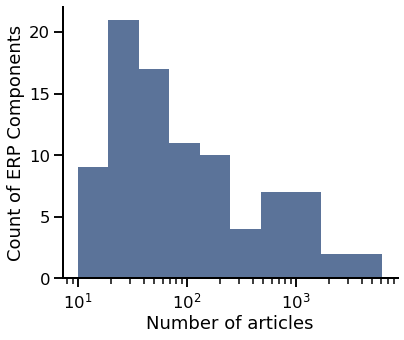

In [14]:
# Plot the histogram of the number of ERP papers collected
plot_count_hist(n_articles, log=True, bins=10,
                xlabel='Number of articles', ylabel='Count of ERP Components',
                save_fig=SAVE_FIG, file_name='erp_hist.pdf', directory=figs_dir)

In [15]:
# Collect all the DOIs across all papers
dois = get_all_values(words, 'dois', unique=True)

In [16]:
# Check the number of unique papers, based on DOIs
print('Number of unique DOIs: \t', len(set(dois)))

Number of unique DOIs: 	 22171


In [17]:
# Check how many articles were found per ERP
for data in words.results:
    print(data.label, '\t', data.n_articles)

P100 	 1823
P150 	 203
P170 	 35
P180 	 84
P200 	 857
P220 	 46
P230 	 23
P240 	 31
P250 	 91
P270 	 17
P300 	 6190
P3a 	 1016
P3b 	 1064
P340 	 10
P350 	 72
P400 	 181
P500 	 62
P550 	 15
P600 	 718
P900 	 21
N100 	 1037
N110 	 23
N120 	 56
N130 	 39
N135 	 46
N140 	 178
N150 	 118
N160 	 57
N170 	 1379
N180 	 39
N190 	 25
N200 	 781
N2a 	 149
N2b 	 237
N2c 	 35
N2pc 	 506
N240 	 20
N250 	 270
N270 	 66
N280 	 23
N290 	 52
N300 	 196
N320 	 26
N350 	 83
N400 	 2597
N450 	 182
N550 	 50
N600 	 15
N700 	 18
MMN 	 3673
LPC 	 647
LPP 	 949
NSW 	 102
PSW 	 112
VPP 	 58
CNV 	 1011
PINV 	 33
ELAN 	 33
LAN 	 56
CPS 	 37
LRP 	 303
LDN 	 37
ORN 	 37
BP 	 526
ERN 	 1031
Pe 	 307
CRN 	 95
MFN 	 97
SPeN 	 126
FRN 	 592
Pd 	 24
EDAN 	 22
LDAP 	 15
ADAN 	 29
EPN 	 243
SN 	 76
SP 	 33
SPN 	 19
SPCN 	 41
PCN 	 62
VsEP 	 198
MRPC 	 300
FSP 	 20
pN 	 23
LPN 	 28
LPoP 	 24
EFN 	 10
FN400 	 168
PMN 	 11
VAN 	 31


## Check Attribute Counts

In [18]:
# Define a list of attributes to check
attrs = ['words', 'keywords', 'authors', 'journals', 'dois', 'titles', 'years']

In [19]:
# Check the proportion of papers, for each attribute, that has data
print('Attribute counts (total # articles: {}):'.format(total_article_count))
for attr in attrs:
    count = get_attribute_counts(words, attr)
    print('    {:5d} articles ({:6.2f} %) have {}.'.format(\
        count, count / total_article_count * 100, attr))

Attribute counts (total # articles: 32101):
    31587 articles ( 98.40 %) have words.
    10903 articles ( 33.96 %) have keywords.
    32081 articles ( 99.94 %) have authors.
    32101 articles (100.00 %) have journals.
    29860 articles ( 93.02 %) have dois.
    32101 articles (100.00 %) have titles.
    32101 articles (100.00 %) have years.


### Check Years of Publication

In [20]:
# Get global count of authors 
years = set(get_all_values(words, 'years'))
min_year, max_year = min(years), max(years)

In [21]:
# Print out summary of the year range of publications
print('Collected papers were published between the years: {}-{}'.format(min_year, max_year))

Collected papers were published between the years: 1963-2021


In [22]:
# Get the count of articles per year, and drop 2021 (incomplete year)
year_counts = get_all_counts(words, 'years', combine=True)
year_counts.pop(2021);

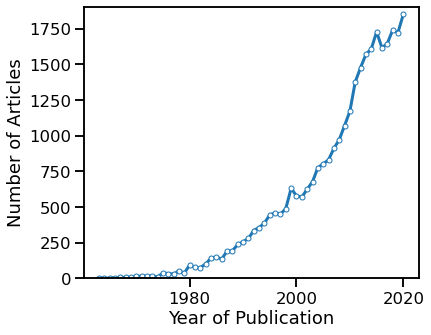

In [23]:
# Plot the total number of articles, across components, per year
plot_years(year_counts, figsize=(6, 5),
           save_fig=SAVE_FIG, file_name='words_year_counts.pdf', directory=figs_dir)

### Check number of distinct components studies per year

In [24]:
# Collect the set of years each component was studied in
comp_years_all = {}
for label, res in zip(words.labels, words.results):
    comp_years_all[label] = set(res.years)

In [25]:
# Collect the number of unique components studied per year
comp_years = {}
for year in range(min(years), max(years)):
    count = 0
    for temp in comp_years_all.values():
        count += 1 if year in temp else 0
    comp_years[year] = count

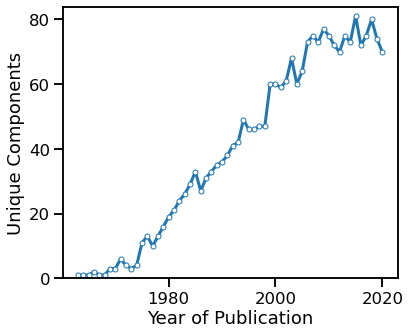

In [26]:
# Plot the number of unique components studied per year
plot_years(comp_years, ylabel='Unique Components', figsize=(6, 5),
           save_fig=SAVE_FIG, file_name='words_year_components.pdf', directory=figs_dir)

### Check Authors across all papers

In [27]:
# Get global count of authors 
author_counts = get_all_counts(words, 'authors', combine=True)

In [28]:
# Check the number of unique authors
print('Total number of authors   :\t {:5d}'.format(len(author_counts)))
print('Number of authors > 10   :\t {:5d}'.format(len(threshold_counter(author_counts, 10))))
print('Number of authors > 100  :\t {:5d}'.format(len(threshold_counter(author_counts, 100))))

Total number of authors   :	 46300
Number of authors > 10   :	  2502
Number of authors > 100  :	    32


In [29]:
# Check the most common authors
print('Most common authors:')
for (author, count) in author_counts.most_common(10):
    print('    {:15s} \t {}'.format(' '.join(author), count))

Most common authors:
    Näätänen R      	 330
    Wang Y          	 277
    Hajcak G        	 209
    Schröger E      	 199
    Zhang Y         	 194
    Holcomb PJ      	 187
    Li H            	 184
    Polich J        	 184
    Wang L          	 168
    Friederici AD   	 168


### Check Journals across all papers

In [30]:
# Get global count of journals
journals_counts = get_all_counts(words, 'journals', combine=True)

In [31]:
# Check the number of unique authors
print('Total number of journals  :\t {:5d}'.format(len(journals_counts)))
print('Number of journals > 10   :\t {:5d}'.format(len(threshold_counter(journals_counts, 10))))
print('Number of journals > 100  :\t {:5d}'.format(len(threshold_counter(journals_counts, 100))))

Total number of journals  :	  2308
Number of journals > 10   :	   353
Number of journals > 100  :	    51


In [32]:
# Check the most common journals
print('Most common journals:')
for (journal, count) in journals_counts.most_common(10):
    print('    {:55s} \t {}'.format(journal.split(':')[0], count))

Most common journals:
    Psychophysiology                                        	 1575
    International journal of psychophysiology               	 1192
    Neuropsychologia                                        	 1016
    Biological psychology                                   	 1001
    Clinical neurophysiology                                	 945
    Brain research                                          	 830
    Neuroreport                                             	 742
    PloS one                                                	 725
    Journal of cognitive neuroscience                       	 715
    Neuroscience letters                                    	 677


### Keywords

In [33]:
# Get global count of authors 
kw_counts = get_all_counts(words, 'keywords', combine=True)

In [34]:
# Check the number of unique keywords
print('Total number of keywords   :\t {:5d}'.format(len(kw_counts)))
print('Number of keywords > 10    :\t {:5d}'.format(len(threshold_counter(kw_counts, 10))))
print('Number of keywords > 100   :\t {:5d}'.format(len(threshold_counter(kw_counts, 100))))

Total number of keywords   :	 14944
Number of keywords > 10    :	   747
Number of keywords > 100   :	    34


In [35]:
# Check the most common keywords across all components
print('Most common keywords:')
for (kw, count) in kw_counts.most_common(10):
    print('    {:20s} \t {}'.format(kw, count))

Most common keywords:
    attention            	 685
    emotion              	 476
    p300                 	 469
    schizophrenia        	 409
    error-related negativity 	 298
    n400                 	 297
    cognitive control    	 229
    p3                   	 227
    aging                	 210
    event-related potential (erp) 	 208


In [36]:
# Check most common keywords per component
for data in words.combined_results:
    data.check_frequencies('keywords', n_check=5)

P100  : visual evoked potentials, visual evoked potential, n170, multiple sclerosis, emotion
P150  : aging, congenital hypothyroidism, iodine diet, psychiatric diseases, thyroid hormones
P170  : attention, hearing loss, neural mechanism, visual compensatory, dft
P180  : transcranial magnetic stimulation, tms-eeg, tms-evoked potentials, dorsolateral prefrontal cortex, schizophrenia
P200  : n400, p300, n170, n100, attention
P220  : complexity, fraser spiral illusion, illusion, shape perception
P230  : confabulation, desynchronization, face recognition, memory schema, theta coherence
P240  : somatosensory cortex, touch, igg-type autoantibody, apolipoprotein b-100, body mass index
P250  : n170, p100, mlpa, 22q11.2 variation, clinical phenotype
P270  : directed transfer function/adaptive directed transfer function, stereoscopic depth, visual discomfort, visual evoked potential, face
P300  : attention, schizophrenia, brain-computer interface, working memory, frn
P3a   : attention, p300, mism

### Abstract Words

In [37]:
# Get global count of words 
word_counts = get_all_counts(words, 'words', combine=True)

In [38]:
# Check the number of unique words
print('Total number of words   :\t {:5d}'.format(len(word_counts)))
print('Number of words > 100   :\t {:5d}'.format(len(threshold_counter(word_counts, 100))))
print('Number of words > 1000  :\t {:5d}'.format(len(threshold_counter(word_counts, 1000))))

Total number of words   :	 95008
Number of words > 100   :	  4323
Number of words > 1000  :	   733


In [39]:
# Check the most common keywords across all components
print('Most common words:')
for (word, count) in word_counts.most_common(10):
    print('    {:20s} \t {}'.format(word, count))

Most common words:
    processing           	 26386
    patients             	 24134
    amplitude            	 20001
    study                	 19923
    task                 	 19040
    results              	 18993
    stimuli              	 18941
    visual               	 15764
    response             	 15694
    auditory             	 15255


In [40]:
# Check most common words
for data in words.combined_results:
    data.check_frequencies('words', n_check=5)

P100  : visual, patients, vep, latency, amplitude
P150  : cells, patients, two, processing, study
P170  : control, components, visual, cortex, ms
P180  : cells, cortex, patients, cortical, subjects
P200  : patients, processing, p300, amplitude, study
P220  : cells, amplitude, de, components, sleep
P230  : ms, components, differences, stimuli, visual
P240  : amplitude, stimuli, stimulus, processing, components
P250  : patients, processing, components, amplitude, task
P270  : stimuli, stimulus, stimulation, amplitude, components
P300  : patients, amplitude, study, latency, cognitive
P3a   : stimuli, auditory, patients, p3b, processing
P3b   : task, processing, stimuli, p3a, amplitude
P340  : pain, seps, patients, training, participants
P350  : processing, stimuli, components, task, subjects
P400  : faces, infants, amplitude, stimuli, processing
P500  : p, subjects, different, two, time
P550  : subjects, task, sounds, larger, group
P600  : processing, syntactic, semantic, sentences, n400


## Check Values by Year

In [41]:
# Extract lists of all values for attributes of interest
all_years = get_all_values(words, 'years')
all_journals = get_all_values(words, 'journals')
all_authors = get_all_values(words, 'authors')

In [42]:
# Collect the number of unique journals & authors by year
journals_by_year = {}
authors_by_year = {}
for year in range(min_year, max_year):
    inds = np.where(np.array(all_years) == year)[0]
    journals_by_year[year] = len(set(np.array(all_journals)[inds]))
    authors_by_year[year] = len(set(combine_lists([all_authors[ind] for ind in inds])))

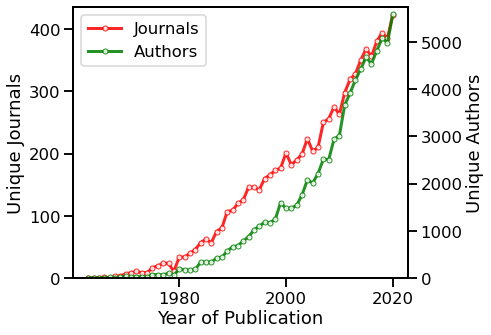

In [43]:
# Plot unique journals & authors by year
plot_attrs_by_year(journals_by_year, authors_by_year, figsize=(6, 5),
                   save_fig=SAVE_FIG, file_name='words_attr_year.pdf', directory=figs_dir)

## Example Component Summaries

In [44]:
# Check some example summaries
inds = [10, 44]
for ind in inds:
    words.combined_results[ind].create_summary()
    words.combined_results[ind].print_summary()

P300 :
  Number of articles: 		 6190
  First publication: 		 1971
  Most common author: 		 Polich J
    number of publications: 	 118
  Most common journal: 		 Psychophysiology
    number of publications: 	 249 

N400 :
  Number of articles: 		 2597
  First publication: 		 1980
  Most common author: 		 Holcomb PJ
    number of publications: 	 91
  Most common journal: 		 Neuropsychologia
    number of publications: 	 216 



### WordCloud Plots

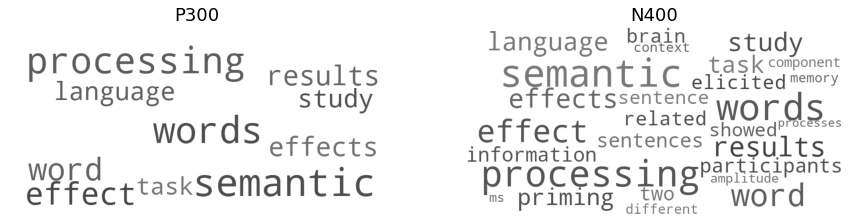

In [45]:
# Create wordclouds
_, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_wordcloud(words.combined_results[ind].words, inds[0], ax=axes[0])
axes[0].set_title(words.labels[inds[0]]);
plot_wordcloud(words.combined_results[ind].words, inds[1], ax=axes[1])
axes[1].set_title(words.labels[inds[1]]);

### History Plots

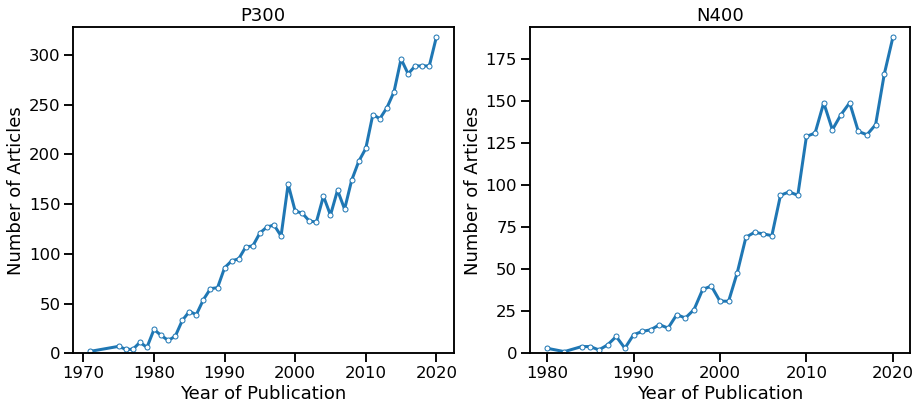

In [46]:
# Check an example history plot
_, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_years(words.combined_results[inds[0]].years, [None, 2020], ax=axes[0])
axes[0].set_title(words.labels[inds[0]]);
plot_years(words.combined_results[inds[1]].years, [None, 2020], ax=axes[1])
axes[1].set_title(words.labels[inds[1]]);